### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-3**
#### DECISION TREE

## Import Library
Gather all necessary libraries for data manipulation and decision tree modeling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Load Dataset
Read the dataset into a data frame to start working with it. 

In [2]:
filepath = None
filepath = "Breast_Cancer.csv"
df = pd.read_csv(filepath)
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Explore the Data


In [3]:
print("\nShape:\n", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)


Shape:
 (4024, 16)

Columns:
 Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Data Types:
 Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


## Check Missing Values
In this section, we check for missing values in the DataFrame. This helps us understand if there are any columns with missing data that need to be handled before further analysis or modeling.


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


## Data Preprocessing

In this section, we use `LabelEncoder` from `sklearn` to transform categorical features into numerical values. This is necessary for machine learning algorithms that require numerical input.


In [5]:
labelencoder = LabelEncoder()

df['Marital Status'] = labelencoder.fit_transform(df['Marital Status'])
df['Race'] = labelencoder.fit_transform(df['Race'])
df['T Stage '] = labelencoder.fit_transform(df['T Stage '])
df['N Stage'] = labelencoder.fit_transform(df['N Stage'])
df['6th Stage'] = labelencoder.fit_transform(df['6th Stage'])
df['differentiate'] = labelencoder.fit_transform(df['differentiate'])
df['Grade'] = labelencoder.fit_transform(df['Grade'])
df['A Stage'] = labelencoder.fit_transform(df['A Stage'])
df['Estrogen Status'] = labelencoder.fit_transform(df['Estrogen Status'])
df['Progesterone Status'] = labelencoder.fit_transform(df['Progesterone Status'])
df['Status'] = labelencoder.fit_transform(df['Status'])

print("\nData Types:\n", df.dtypes)
df.head()


Data Types:
 Age                       int64
Race                      int64
Marital Status            int64
T Stage                   int64
N Stage                   int64
6th Stage                 int64
differentiate             int64
Grade                     int64
A Stage                   int64
Tumor Size                int64
Estrogen Status           int64
Progesterone Status       int64
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int64
dtype: object


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


## Splitting the Dataset into Training, Validation, and Test Sets

In this section, we split the dataset into training, validation, and test sets using `train_test_split` from `sklearn`. The dataset is first split into training and test sets, and then the training set is further split into training and validation sets.


In [6]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=1)
train_df,val_df = train_test_split(train_df,test_size=0.2,random_state=1)
print("\nTrain Set Shape: ",train_df.shape)
print("Validation Set Shape: ",val_df.shape)
print("Test Set Shape: ",test_df.shape)


Train Set Shape:  (2575, 16)
Validation Set Shape:  (644, 16)
Test Set Shape:  (805, 16)


## Extracting Features and Labels

In this section, we extract the features(independent variables) and labels(dependent variable, "Status") from the training, validation, and test sets. The features are all columns except the last one, and the labels are the last column.


In [7]:
X_train = np.array(train_df.iloc[:, :-1].values)
y_train = np.array(train_df.iloc[:, -1].values)
X_val = np.array(val_df.iloc[:, :-1].values)
y_val = np.array(val_df.iloc[:, -1].values)
X_test = np.array(test_df.iloc[:, :-1].values)
y_test = np.array(test_df.iloc[:, -1].values)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2575, 15) (2575,)
(644, 15) (644,)
(805, 15) (805,)


## Modified Decision Tree Implementation

In this section, we implement a modified decision tree classifier using `Gini impurity`.

In [8]:
class ModifiedDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def split(self, X, y, feature, threshold):
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def best_split(self, X, y):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gini_left = self.gini(y_left)
                gini_right = self.gini(y_right)
                gini_split = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)

                if gini_split < best_gini:
                    best_gini = gini_split
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {'predicted_class': predicted_class}

        if depth < self.max_depth:
            feature, threshold = self.best_split(X, y)
            if feature is not None:
                X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)
                node['feature'] = feature
                node['threshold'] = threshold
                node['left'] = self.build_tree(X_left, y_left, depth + 1)
                node['right'] = self.build_tree(X_right, y_right, depth + 1)

        return node

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x, tree):
        if 'feature' not in tree:
            return tree['predicted_class']
        if x[tree['feature']] < tree['threshold']:
            return self.predict_sample(x, tree['left'])
        else:
            return self.predict_sample(x, tree['right'])

    def predict(self, X):
        return [self.predict_sample(x, self.tree) for x in X]
    
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

## Training and Evaluating the Modified Decision Tree

In this section, we train the `ModifiedDecisionTree` model on the training data, evaluate its performance on both the training and validation sets, and plot the accuracy for varying depths.


In [9]:
train_accuracies = []
val_accuracies = []

for epoch in range(1, 21):
    model = ModifiedDecisionTree(max_depth=epoch)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = model.accuracy(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = model.accuracy(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f'Depth: {epoch}, Train Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

Depth: 1, Train Accuracy: 0.90, Validation Accuracy: 0.89
Depth: 2, Train Accuracy: 0.90, Validation Accuracy: 0.89
Depth: 3, Train Accuracy: 0.90, Validation Accuracy: 0.88
Depth: 4, Train Accuracy: 0.87, Validation Accuracy: 0.86
Depth: 5, Train Accuracy: 0.87, Validation Accuracy: 0.86
Depth: 6, Train Accuracy: 0.86, Validation Accuracy: 0.85
Depth: 7, Train Accuracy: 0.86, Validation Accuracy: 0.84
Depth: 8, Train Accuracy: 0.86, Validation Accuracy: 0.85
Depth: 9, Train Accuracy: 0.85, Validation Accuracy: 0.83
Depth: 10, Train Accuracy: 0.85, Validation Accuracy: 0.83
Depth: 11, Train Accuracy: 0.85, Validation Accuracy: 0.83
Depth: 12, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth: 13, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth: 14, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth: 15, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth: 16, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth: 17, Train Accuracy: 0.84, Validation Accuracy: 0.83
Depth:

#### Note on the depth of tree
As observed from the above accuracies on the different depths of tree, we see that the maximum accuracy is achieved at only 1 split.
*  But we will use a average depth of decision tree for final model to generalize it.
 * Splitting further allows the tree to capture more subtle and complex patterns in the data.
 * A single split might not generalize well to unseen data, leading to overfitting or high bias.
 * Further splitting reduces impurity and improves the decision boundary, especially in real-world data with complex relationships between features and the target.

## Plotting Training and Validation Accuracy

In this section, we plot the training and validation accuracy against the maximum depth of the decision tree. This helps us visualize how the model's performance changes with `varying depths`.


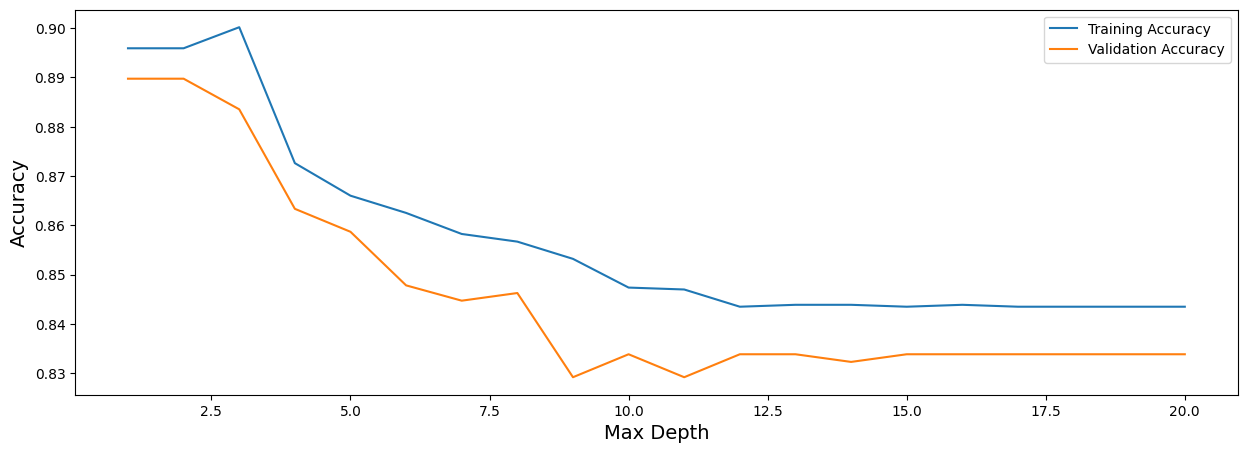

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

## Evaluating the Model on Test Sets

In this section, we evaluate the `ModifiedDecisionTree` model on the test sets. We print the confusion matrix and accuracy for both sets and visualize the confusion matrix for the test set using a heatmap.



Test Set:


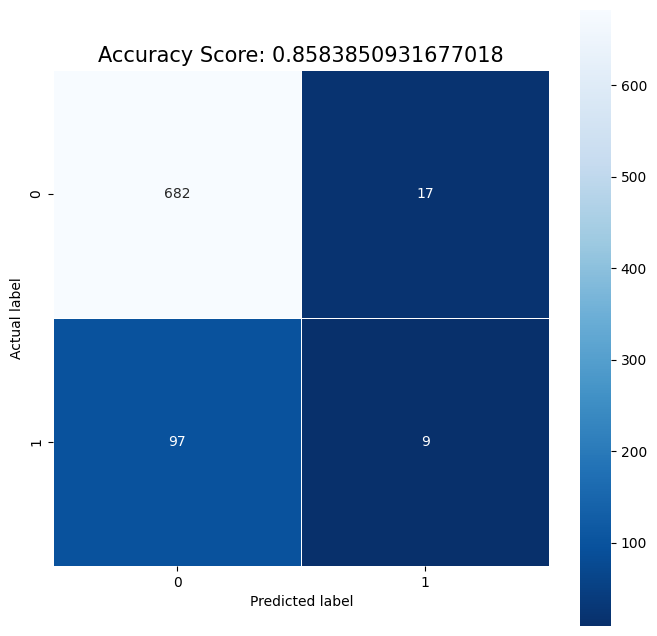


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       699
           1       0.35      0.08      0.14       106

    accuracy                           0.86       805
   macro avg       0.61      0.53      0.53       805
weighted avg       0.81      0.86      0.82       805



In [13]:
tree = ModifiedDecisionTree(max_depth=7)
tree.fit(X_train, y_train)

y_pred_test = tree.predict(X_test)
print("\nTest Set:")

plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred_test))
plt.title(all_sample_title, size=15)
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## Visualizing the Decision Tree

In this section, we define a function to visualize the decision tree. The function `plot_tree` recursively draws the nodes and edges of the tree, displaying feature names, thresholds, and class labels.


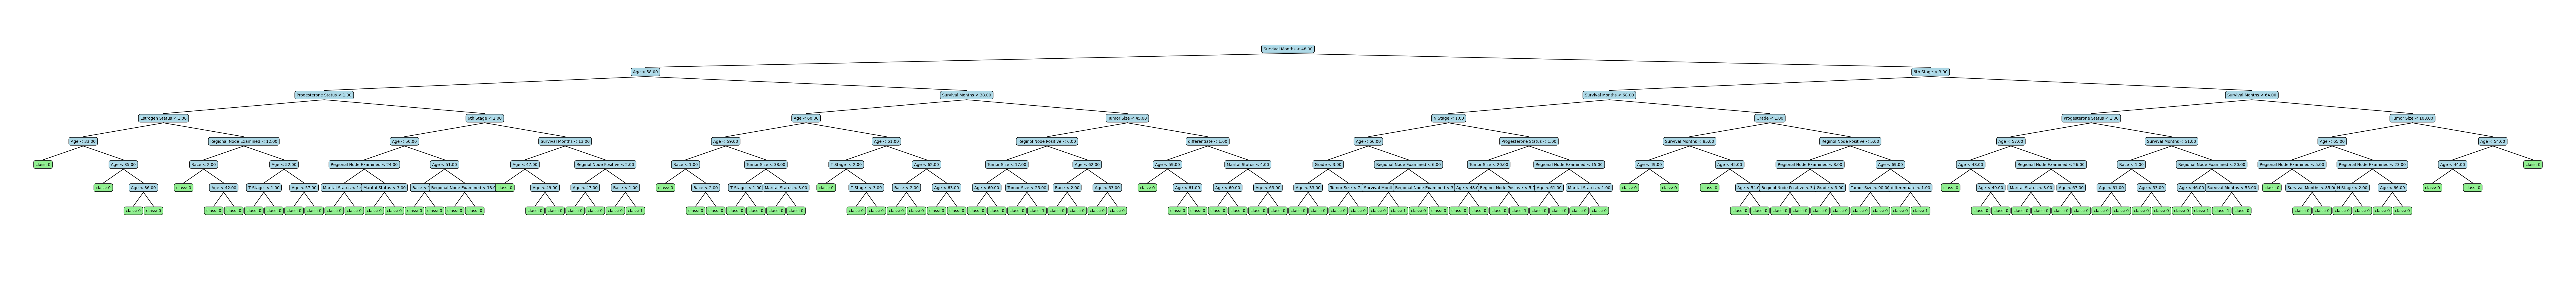

In [12]:
def plot_tree(tree, feature_names):
    def draw_node(node, x0, x1, y, depth):
        if 'feature' in node:
            feature_name = feature_names[node['feature']]
            threshold = node['threshold']
            
            # Draw feature name and threshold
            plt.text((x0 + x1) / 2, y, f"{feature_name} < {threshold:.2f}", ha="center", va="center", 
                     fontsize=10, bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
            
            # Calculate midpoint for connecting lines
            mid_x = (x0 + x1) / 2
            next_y = y - 1
            
            # Draw lines from parent to children
            left_mid_x = (x0 + mid_x) / 2
            right_mid_x = (mid_x + x1) / 2
            
            # Line to the left child
            plt.plot([mid_x, left_mid_x], [y - 0.2, next_y + 0.2], 'k-', lw=1.5)
            
            # Line to the right child
            plt.plot([mid_x, right_mid_x], [y - 0.2, next_y + 0.2], 'k-', lw=1.5)
            
            # Recursively draw the left and right children
            draw_node(node['left'], x0, mid_x, next_y, depth + 1)
            draw_node(node['right'], mid_x, x1, next_y, depth + 1)
        else:
            # Draw the class for leaf nodes
            plt.text((x0 + x1) / 2, y, f"class: {node['predicted_class']}", ha="center", va="center", 
                     fontsize=10, bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.figure(figsize=(90, 10))  # Increase figure size for better visibility
    draw_node(tree, 0, 100, 10, 0)
    plt.xlim(0, 100)
    plt.ylim(0, 12)  # Increase ylim to avoid crowding
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_tree(tree.tree, df.columns[:-1])